In [128]:
# !kaggle datasets download -d robikscube/hourly-energy-consumption

In [129]:
# import zipfile

# zip_file_path = 'hourly-energy-consumption.zip'

# extract_dir = 'data/'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('data/PJME_hourly.csv')

df.head(5)

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [133]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [134]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

<Figure size 1500x500 with 0 Axes>

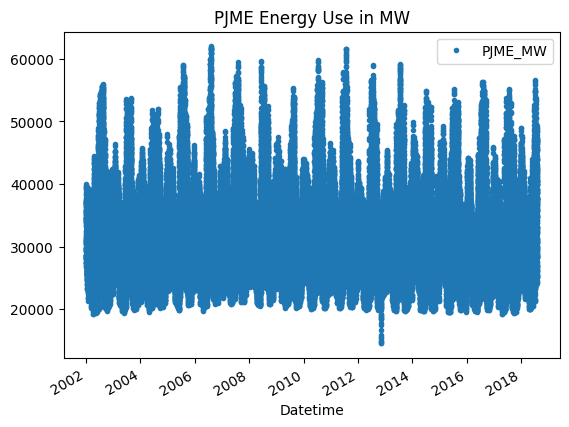

In [135]:
plt.figure(figsize=(15,5))

color_pal = sns.color_palette()

df.plot(style='.', color=color_pal[0], title='PJME Energy Use in MW')
plt.show()

Train Test Split Data

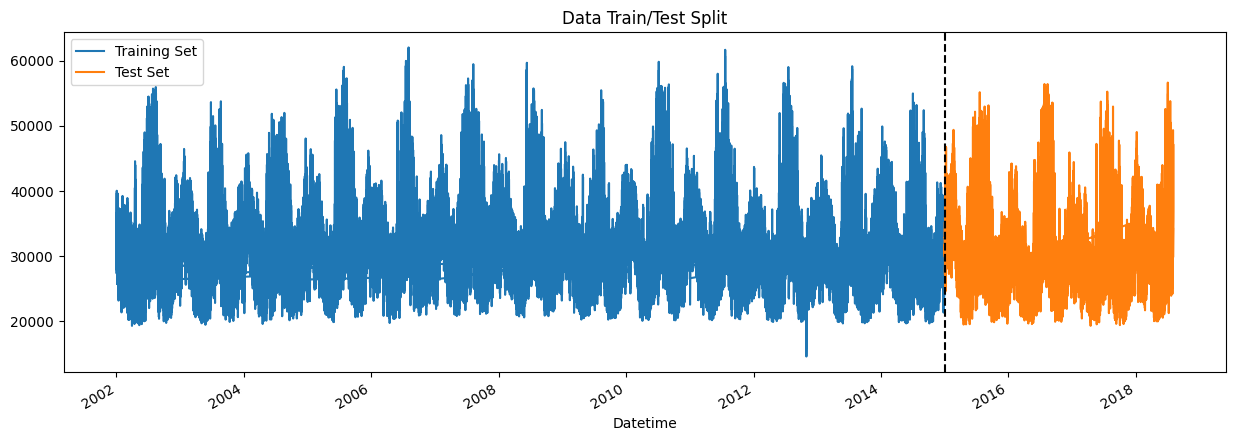

In [136]:
train = df.loc[df.index <'01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black',ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

<Axes: xlabel='Datetime'>

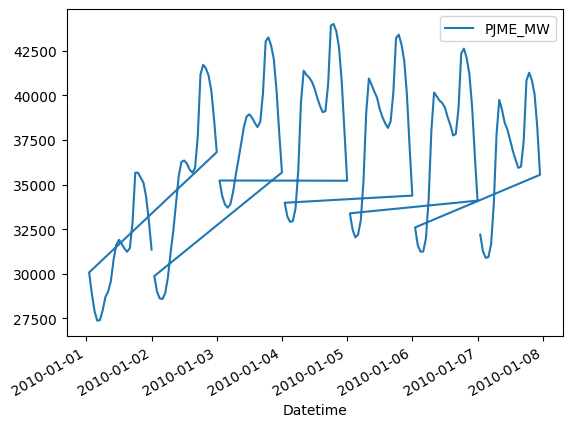

In [137]:
df.loc[(df.index >'01-01-2010') & (df.index < '01-08-2010')].plot()

Feature Creation

In [138]:
def create_features(df):
  """
  Create time series features based on time series index.
  """
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

df = create_features(df)


In [139]:
df.head(5)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


Visualize our Feature / Target Relationship

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\747355698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJME_MW', palette=sns.color_palette())
C:\Users\jason\AppData\Local\Temp\ipykernel_1600\747355698.py:2: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='hour', y='PJME_MW', palette=sns.color_palette())


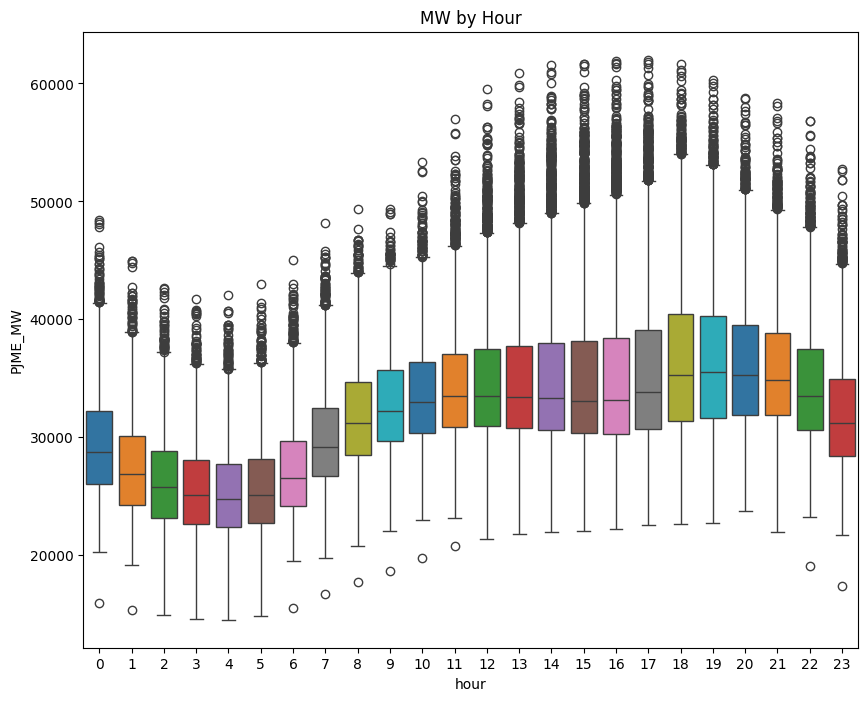

In [140]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', palette=sns.color_palette())
ax.set_title('MW by Hour')
plt.show()

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\2202713226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')


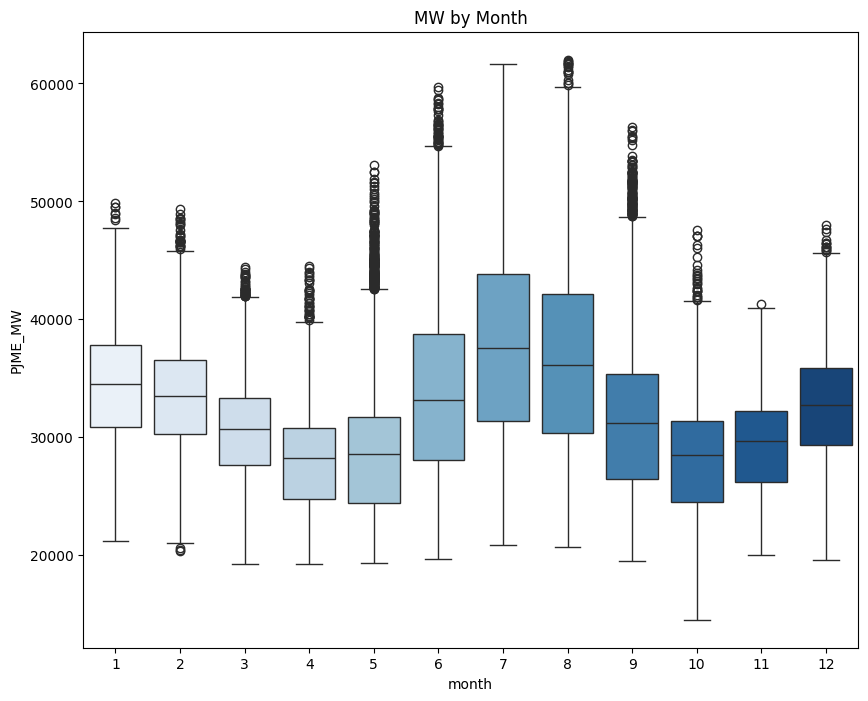

In [141]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

Create our Model

In [142]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [143]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\619522554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\jason\AppData\Local\Temp\ipykernel_1600\619522554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\jason\AppData\Local\Temp\ipykernel_1600\619522554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [144]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [145]:
X_train.columns

Index(['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'], dtype='object')

In [146]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6447.78573	validation_1-rmse:6517.54145
[100]	validation_0-rmse:6026.49339	validation_1-rmse:6131.08053
[200]	validation_0-rmse:5654.75124	validation_1-rmse:5796.65490
[300]	validation_0-rmse:5326.88030	validation_1-rmse:5505.59274
[400]	validation_0-rmse:5039.56899	validation_1-rmse:5253.21086
[500]	validation_0-rmse:4788.58887	validation_1-rmse:5034.74880
[600]	validation_0-rmse:4565.97498	validation_1-rmse:4847.76655
[700]	validation_0-rmse:4372.19812	validation_1-rmse:4687.11295
[800]	validation_0-rmse:4202.53312	validation_1-rmse:4547.57144
[900]	validation_0-rmse:4055.65261	validation_1-rmse:4427.00726
[999]	validation_0-rmse:3929.32983	validation_1-rmse:4325.35302


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Feature Importance

In [147]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

<Axes: title={'center': 'Feature Importance'}>

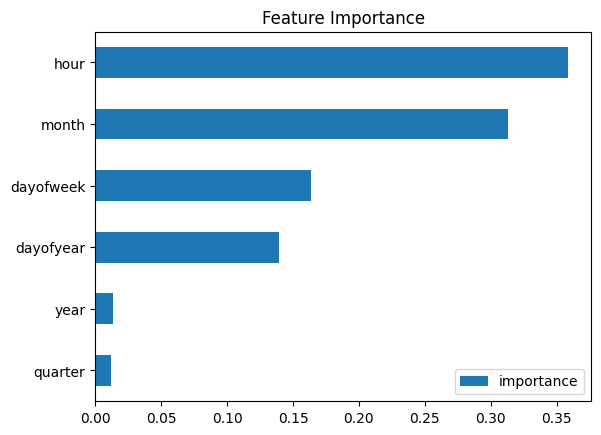

In [148]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')

In [149]:
test['prediction'] = reg.predict(X_test)

test['prediction']

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\3063391586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


Datetime
2015-01-01 00:00:00    32089.679688
2015-12-31 01:00:00    29669.609375
2015-12-31 02:00:00    28957.384766
2015-12-31 03:00:00    28957.384766
2015-12-31 04:00:00    28957.384766
                           ...     
2018-01-01 20:00:00    35219.347656
2018-01-01 21:00:00    35219.347656
2018-01-01 22:00:00    35138.976562
2018-01-01 23:00:00    34573.492188
2018-01-02 00:00:00    32089.679688
Name: prediction, Length: 31440, dtype: float32

In [150]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,NaN
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,NaN
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,NaN
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,NaN
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,35219.347656
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,35219.347656
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,35138.976562


Forecast on Test

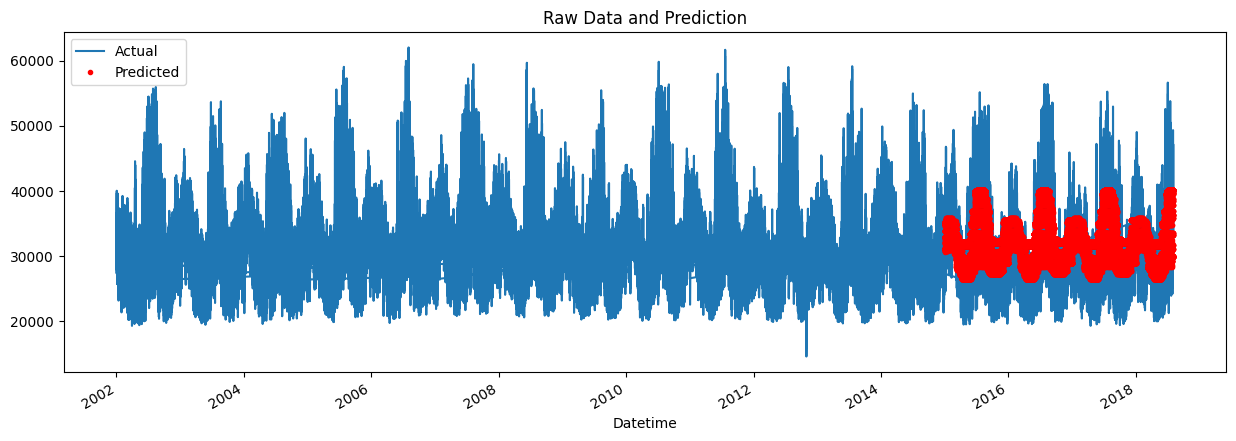

In [151]:
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.', color='red')
plt.legend(['Actual', 'Predicted'])
ax.set_title('Raw Data and Prediction')
plt.show()

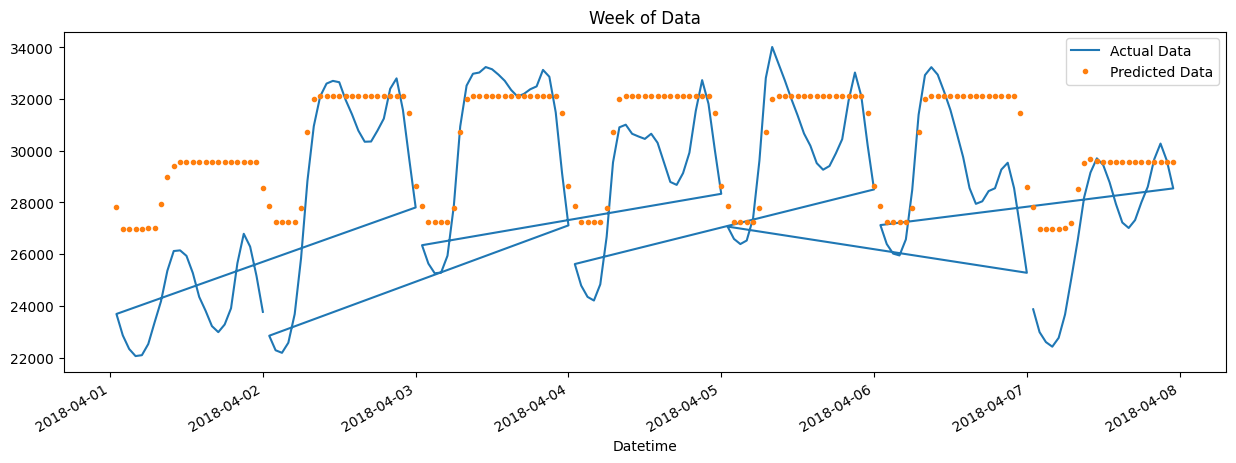

In [152]:
ax = df.loc[(df.index >'04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
.plot(figsize=(15,5), title='Week of Data')
df.loc[(df.index >'04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
.plot(style='.')
plt.legend(['Actual Data', 'Predicted Data'])
plt.show()

In [155]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4325.35


In [156]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\1709595864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['prediction'])


In [157]:
test['date'] = test.index.date

C:\Users\jason\AppData\Local\Temp\ipykernel_1600\2096088089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


In [159]:
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

date
2016-08-13    12092.418620
2016-08-14    11407.225098
2018-01-06    11024.924316
2015-02-20    10791.006348
2016-09-09    10337.963704
Name: error, dtype: float64

In [160]:
test.groupby('date')['error'].mean().sort_values().head(5)

date
2016-12-29    764.857666
2016-12-30    783.728760
2017-11-18    849.959310
2017-03-18    870.751546
2018-04-03    880.189860
Name: error, dtype: float64

Next steps
- More robust cross validation
- Add more features(weather forecast, holidays)
